# Deep learninig with Fashion MNIST dataset

In [2]:
import tensorflow as tf 
from PIL import Image

In [3]:
dataset =  tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) =  dataset.load_data()

# splitting and scalling the input b/w 0-1 
X_val, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

4422102/4422102 [==============================] - 5s 1us/step


In [4]:
#  define Class Labels

labels= [' T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Scandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

print(labels[y_train[0]])


Coat


In [15]:
# from PIL import Image

img= Image.fromarray(X_train[0],'RGB')
img


In [16]:
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    model.add(tf.keras.layers.Dense(300, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

In [17]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
X_train.shape

(55000, 28, 28)

In [19]:
model.compile(loss=['sparse_categorical_crossentropy'], metrics=['accuracy'], optimizer='sgd')
history=model.fit(X_train, y_train, validation_data=(X_val, y_valid), epochs=30)
history=history.history

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.6990 - accuracy: 0.7692 - val_loss: 0.5143 - val_accuracy: 0.8232
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4831 - accuracy: 0.8321 - val_loss: 0.4384 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4390 - accuracy: 0.8457 - val_loss: 0.4217 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4130 - accuracy: 0.8556 - val_loss: 0.3955 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3940 - accuracy: 0.8615 - val_loss: 0.3811 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3795 - accuracy: 0.8659 - val_loss: 0.3889 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3656 - accuracy: 0.8704 - val_loss: 0.3745 - val_accuracy:

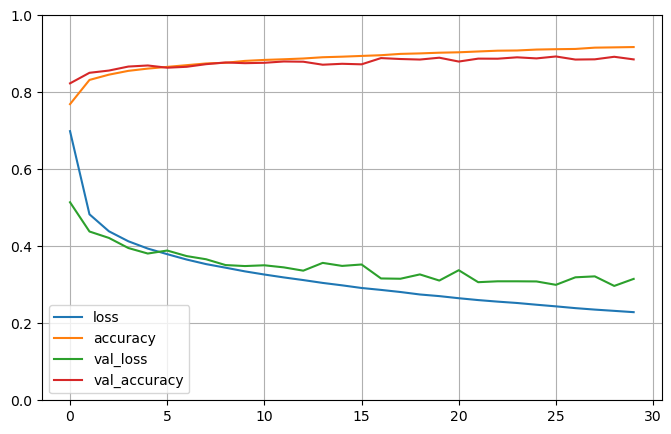

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()